In [2]:
import sys, os
import json, pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import time as pytime
import statsmodels.tsa.stattools as tsa
import ruptures as rpt
sys.path.append('../..')
import InsanallyLabEphysTools as ilep
from scipy.stats import gaussian_kde, sem, ttest_ind, ttest_rel, norm, mannwhitneyu, linregress, wilcoxon
from tqdm import tqdm
from types import SimpleNamespace
from sklearn import linear_model
from sklearn.model_selection import KFold
import seaborn as sns
import traceback
from itertools import product
from brokenaxes import brokenaxes
import pingouin as pg
import colorsys

plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['axes.labelsize'] = 'medium'
plt.rcParams['axes.formatter.limits'] = [-2,3]
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['figure.dpi'] = '150'

#Set global font parameters
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
#Set font type to TrueType for compatibility
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

TARGET_COLOR = 'g'#'#109747'
NONTARGET_COLOR = 'r'#'black'

CR_COLOR = '#808080'
NCR_COLOR = '#FF767C'
CNO_COLOR = '#00BFFF'
SWITCH_COLOR = '#B07A3B'
LASER_COLOR = '#3375E9'
GOOD_GREY = '#969696'
GOOD_GREEN = '#32A852'
NCR_COLOR_DESAT = '#D98C90'
CR_COLOR_DESAT = '#A0A0A0'
NCR_CR_cmap = mpl.colors.LinearSegmentedColormap.from_list('NCR-CR color map', [NCR_COLOR, CR_COLOR], N=1000)
PHASE_COLORS = ['#DEB9E0','#B78AB9','#906D92','#ABC5E8','#869BB7','#5E6C80']#,'#6ded94','#50d979','#36bf5f']

dualanimalnames = ['BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_67','BS_70','BS_72','BS_87','BS_108']
danimals = ['DS_15','DS_19','DS_24','DS_27','DS_28']

retroanimals = ['PB_86','BS_86','PB_92','BS_92','BS_100','BS_103','BS_111','BS_119','BS_123','BS_128','BS_131','BS_139','BS_163','BS_165']
did_learn = ['BS_92','BS_103','BS_111','BS_179']
did_not_learn = ['BS_86','BS_100','BS_119','BS_123','BS_128','BS_131','BS_163','BS_174']
indeterminate = ['BS_139','BS_165','BS_191','BS_192']

dualanimalnames = ['BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_67','BS_70','BS_72','BS_87','BS_108']#,'DS_15','DS_19']
opsinanimalnames = ['BS_86','BS_92','BS_100','BS_103','BS_111','BS_119','BS_123','BS_128','BS_131','BS_139','BS_163','BS_165','BS_174','BS_179','BS_191','BS_192']
tuninganimalnames = ['BS_173','BS_175','BS_187','BS_188','BS_213','BS_214','TH_217','AE_235','AE_236','TH_237']
unuseddualanimals = ['BS_78']
danimals = ['DS_15','DS_19','DS_24','DS_27','DS_28','DS_16','DS_17','DS_22','DS_13','DS_23']

#act_directory = 'D:\\Analysis_Cache_archived_Oct_27_2022'
act_directory = '..\\..\\Data\\Analysis_Cache'#'C:\\Users\insan\\Desktop\\Analysis_Cache_Aug23'
beh_directory = '..\\..\\Data\\Behavioor'

stim25sdecodingfilename = 'D:\\stimdecoding_25s.csv'
stim25sopsinondecodingfilename = 'D:\\stimdecoding_25s_opsin_on.csv'
stim25sopsinoffdecodingfilename = 'D:\\stimdecoding_25s_opsin_off.csv'

current_version = 1 #June 22nd, 2023
current_version = 2 #July 11th, 2023
current_version = 3 #July 21th, 2023
current_version = 4 #July 31th, 2023
current_version = 5 #Aug 2nd, 2023
current_version = 6 #Aug 12th, 2023

stdfont = 14
stdyfrac = 0.06

In [3]:
animals = np.concatenate((dualanimalnames,['DS_15','DS_19']))#,'AE_267']))

In [4]:
animalBehaviors = ilep.getAllBehavior(beh_directory)

Fetching files for BS_51
Fetching files for BS_52
Fetching files for BS_56
Fetching files for BS_59
Fetching files for BS_61
Fetching files for BS_86
Fetching files for BS_92
Fetching files for BS_100
Fetching files for BS_103
Fetching files for BS_111
Fetching files for BS_119
Fetching files for BS_123
Fetching files for BS_128
Fetching files for BS_131
Fetching files for BS_139
Fetching files for BS_163
Fetching files for BS_165
Fetching files for BS_174
Fetching files for BS_179
Fetching files for BS_191
Fetching files for BS_192
Fetching files for BS_33
Fetching files for BS_67
Fetching files for BS_73
Fetching files for BS_78
Fetching files for BS_108
Fetching files for BS_40
Fetching files for BS_41
Fetching files for BS_42
Fetching files for BS_49
Fetching files for BS_50
Fetching files for BS_70
Fetching files for BS_72
Fetching files for BS_83
Fetching files for BS_85
Fetching files for BS_87
Fetching files for BS_95
Fetching files for BS_113
Fetching files for DS_15
Fetching 

C:\Users\4thgr\OneDrive\Documents\TothSidleck2024\Notebooks\Reviewer 1\../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in scalar divide
  pc = (hit+creject)/(hit+miss+falarm+creject)
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy shou

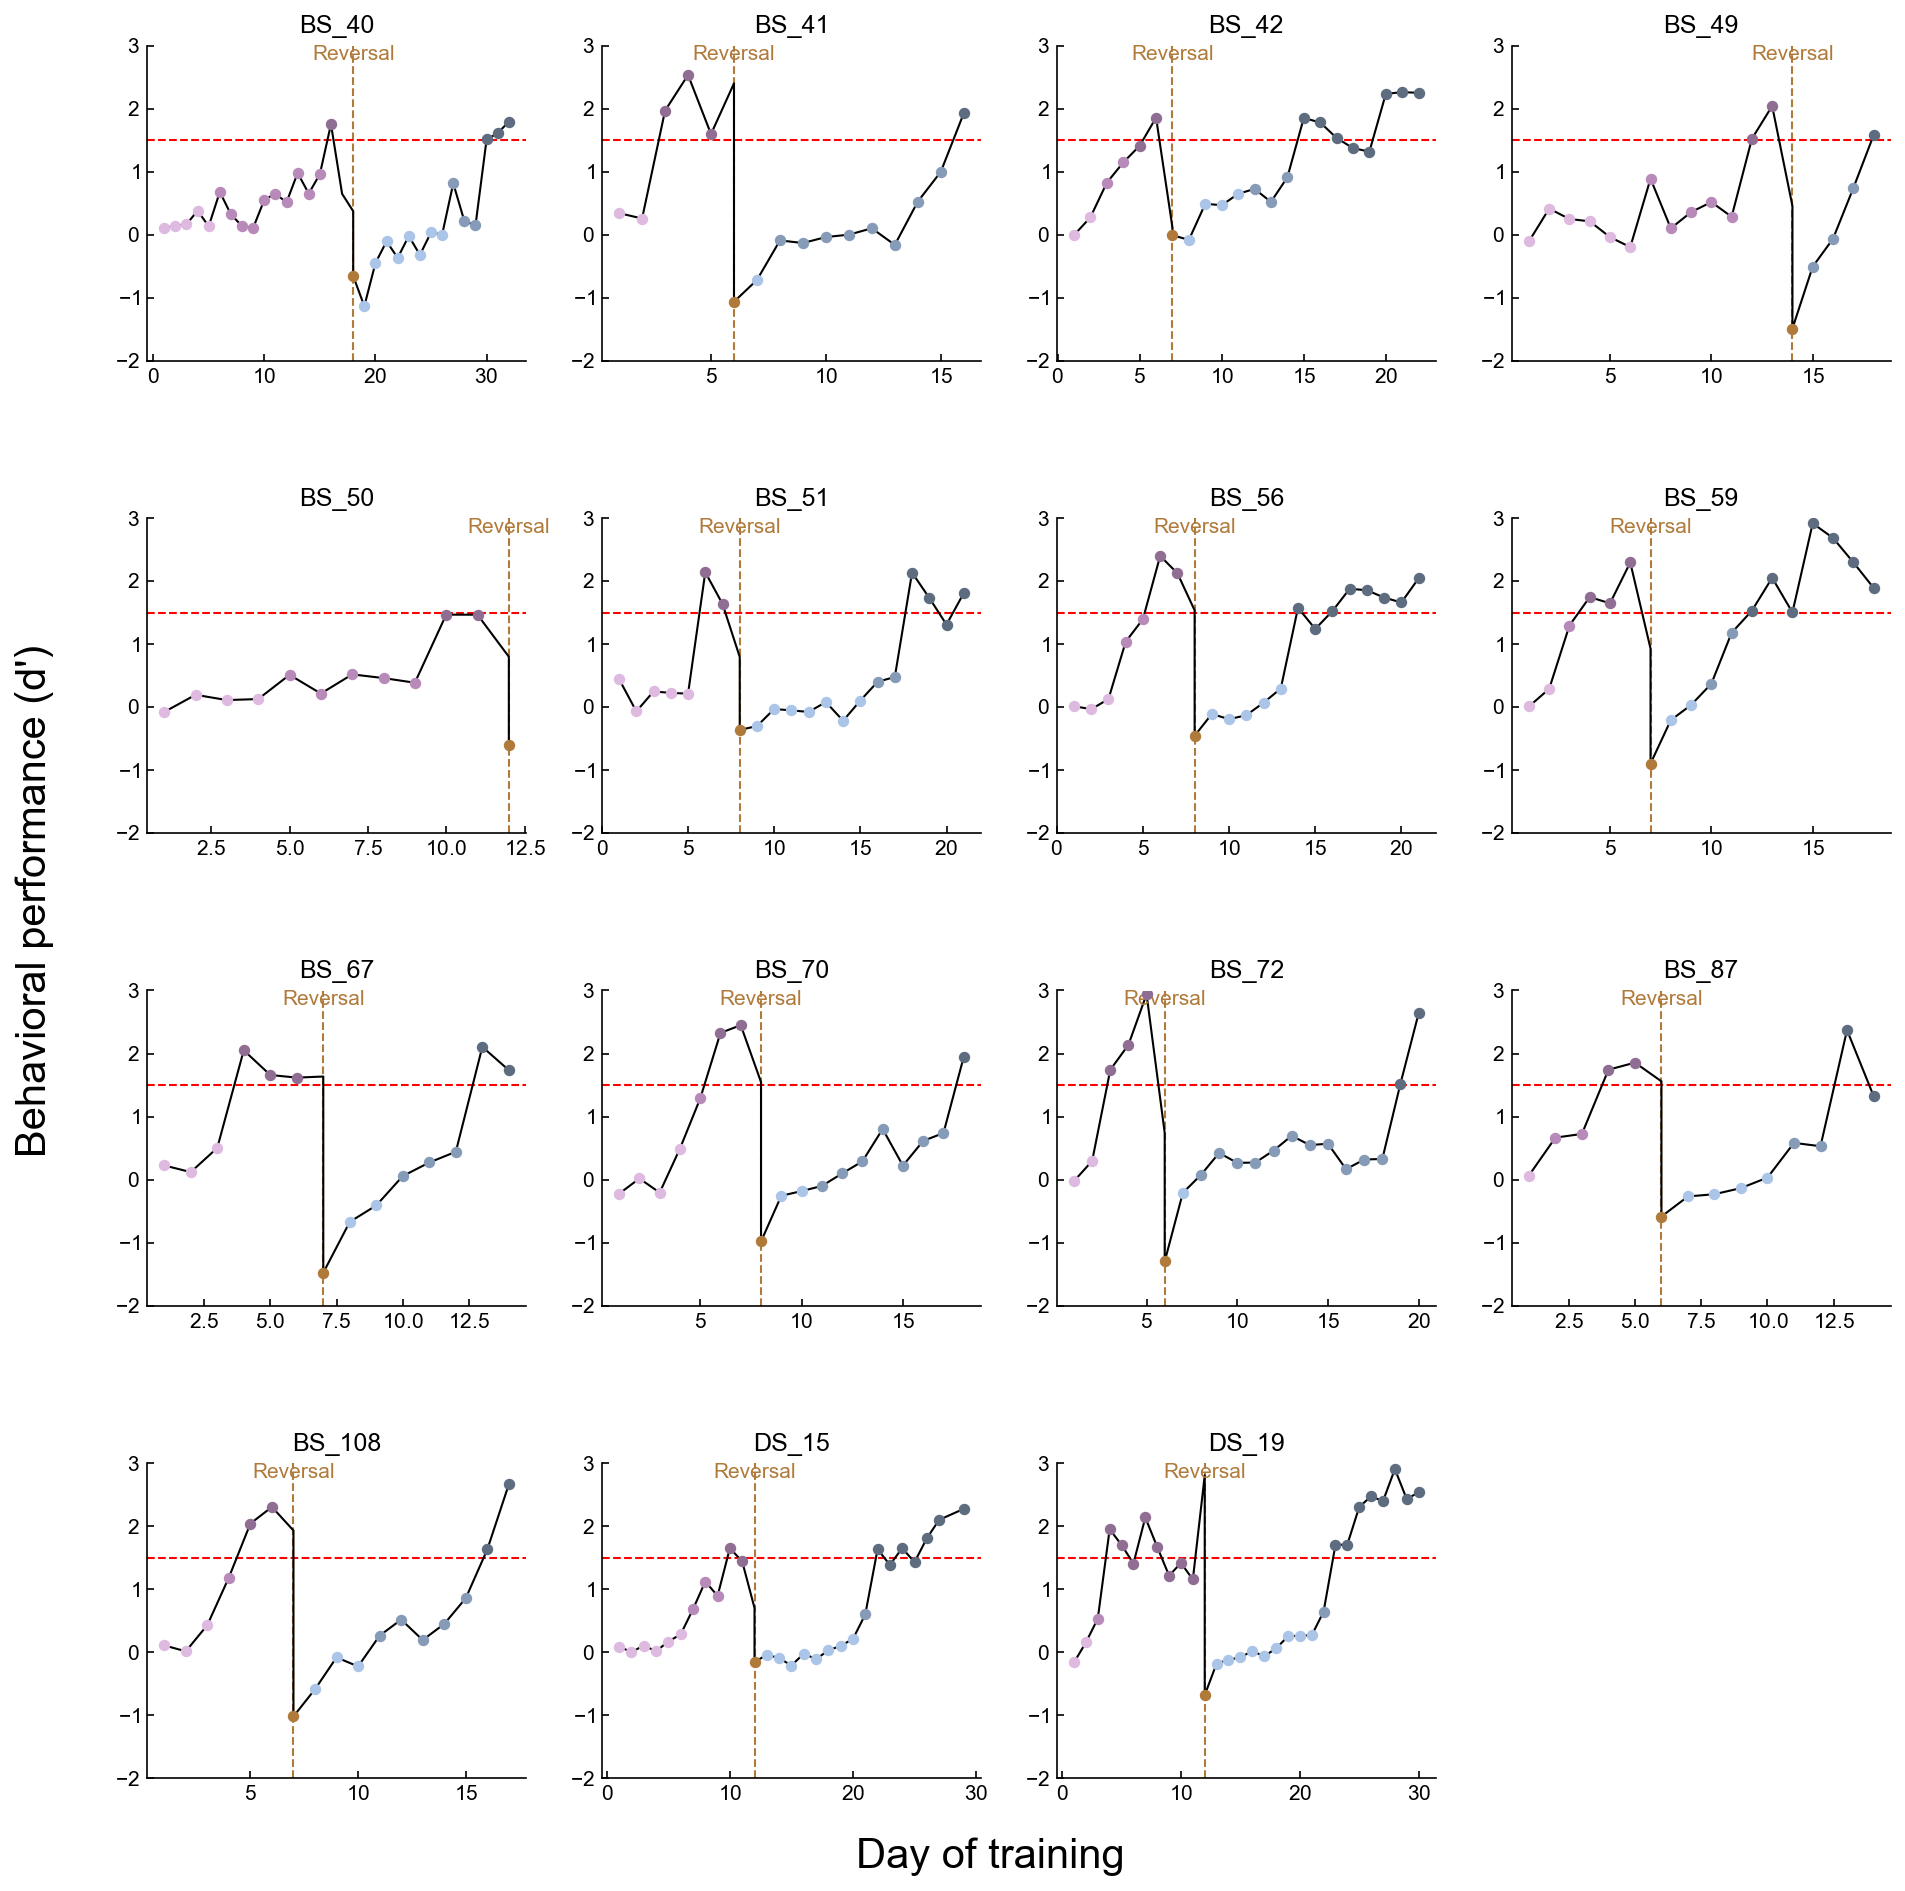

In [5]:
learning_phases,_,_ = ilep.calculateLearningPhasesV2(animals,animalBehaviors,plot=True)

In [6]:
EnumSession = []
EnumClust = []
sessions = os.listdir(act_directory)
for session in tqdm(sessions):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    if sessionfile.meta.task in ['passive no beahvior']:
        continue
    if sessionfile.meta.task in ['tuning nonreversal','tuning switch','tuning reversal']:
        continue
    if sessionfile.meta.region != 'AC':
        continue
        
    if sessionfile.meta.animal not in animals:
        continue
    
    for clust in sessionfile.clusters.good:
        EnumSession.append(session)
        EnumClust.append(clust)

100%|██████████| 740/740 [00:13<00:00, 55.49it/s] 


In [7]:
EILphases = np.full_like(EnumSession,np.nan)
error_animals = []

for idx,session in enumerate(tqdm(EnumSession)):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    try:
        animal = sessionfile.meta.animal
        day = sessionfile.meta.day_of_training
        
        if sessionfile.meta.task in ['switch','opto switch','tuning switch']:
            EILphases[idx] = 'switch'

        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal'] and day in learning_phases[animal].pre_early_days:
            EILphases[idx] = 'pre early'
        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal']  and day in learning_phases[animal].pre_late_days:
            EILphases[idx] = 'pre late'
        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal'] and day in learning_phases[animal].pre_expert_days:
            EILphases[idx] = 'pre expert'

        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_early_days:
            EILphases[idx] = 'post early'
        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_late_days:
            EILphases[idx] = 'post late'
        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_expert_days:
            EILphases[idx] = 'post expert'
    except Exception as e:
        #print(ilep.generateDateString(sessionfile))
        error_animals.append(sessionfile.meta.animal)
        pass
                             
error_animals = np.unique(error_animals)
print('errors for: '+str(error_animals))

100%|██████████| 1829/1829 [00:52<00:00, 35.00it/s] 

errors for: []


In [8]:
cellstouseFR = 'all cells'
#cellstouseFR = 'task encoders'

animals_list = []
sessions_list = []
cluster_ID_list = []
learning_phase_list = []
target_firing_list = []
nontarget_firing_list = []

for idx,(session,clust) in tqdm(enumerate(zip(EnumSession,EnumClust))):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    #Currently not active as tuning curve animals have not been decoded
    if cellstouseFR == 'task encoders':
        if not np.isfinite(accuracies[idx]) or pvals[idx] > 0.05 or accuracies[idx] < task_encoder_threshold:
            continue
    
    if EILphases[idx] not in ['pre expert','post expert'] and sessionfile.meta.animal in ['DS_15','DS_19']:
        continue
        
    try:
        FR_target = sessionfile.responsiveness[clust]['correct'].FR
        FR_bl_target = sessionfile.responsiveness[clust]['correct'].FRbaseline
        FR_nontarget = sessionfile.responsiveness[clust]['incorrect'].FR
        FR_bl_nontarget = sessionfile.responsiveness[clust]['incorrect'].FRbaseline
        Tuning_target = (FR_target - FR_bl_target)# / FR_bl_target
        Tuning_nontarget = (FR_nontarget - FR_bl_nontarget)# / FR_bl_nontarget
    except Exception as e:
        Tuning_target = np.nan
        Tuning_nontarget = np.nan
        print(e)

    if EILphases[idx] not in ['pre early','pre late','pre expert','post early','post late','post expert']:
        continue

    animals_list.append(sessionfile.meta.animal)
    sessions_list.append(session)
    cluster_ID_list.append(clust)
    learning_phase_list.append(EILphases[idx])
    target_firing_list.append(Tuning_target)
    nontarget_firing_list.append(Tuning_nontarget)

1829it [00:54, 33.84it/s] 


In [9]:
df_dict = dict()
df_dict['animal'] = animals_list
df_dict['session'] = sessions_list
df_dict['cluster ID'] = cluster_ID_list
df_dict['learning phase'] = learning_phase_list
df_dict['target rate'] = target_firing_list
df_dict['nontarget rate'] = nontarget_firing_list
df = pd.DataFrame(df_dict)

In [10]:
df

,animal,session,cluster ID,learning phase,target rate,nontarget rate
0,BS_108,BS_108_1_AC.pickle,2,pre expert,11.560284,4.444444
1,BS_108,BS_108_1_AC.pickle,8,pre expert,25.085911,9.876543
2,BS_108,BS_108_1_AC.pickle,9,pre expert,18.419244,-8.395062
3,BS_108,BS_108_1_AC.pickle,14,pre expert,14.468085,-1.975309
4,BS_108,BS_108_1_AC.pickle,34,pre expert,20.000000,9.876543
...,...,...,...,...,...,...
1358,DS_19,DS_19_1_AC.pickle,96,pre expert,3.247232,2.624672
1359,DS_19,DS_19_1_AC.pickle,106,pre expert,1.997677,-2.892157
1360,DS_19,DS_19_20_AC.pickle,7,post expert,4.731183,-2.807018
1361,DS_19,DS_19_20_AC.pickle,8,post expert,-3.182796,-2.105263


In [11]:
Tuning_target_preearly = []
Tuning_target_prelate = []
Tuning_target_preexpert = []
Tuning_target_postearly = []
Tuning_target_postlate = []
Tuning_target_postexpert = []

Tuning_nontarget_preearly = []
Tuning_nontarget_prelate = []
Tuning_nontarget_preexpert = []
Tuning_nontarget_postearly = []
Tuning_nontarget_postlate = []
Tuning_nontarget_postexpert = []

for row in df.iloc:
    if row['learning phase'] == 'pre early':
        Tuning_target_preearly.append(row['target rate'])
        Tuning_nontarget_preearly.append(row['nontarget rate'])
    if row['learning phase'] == 'pre late':
        Tuning_target_prelate.append(row['target rate'])
        Tuning_nontarget_prelate.append(row['nontarget rate'])
    if row['learning phase'] == 'pre expert':
        Tuning_target_preexpert.append(row['target rate'])
        Tuning_nontarget_preexpert.append(row['nontarget rate'])
        
    if row['learning phase'] == 'post early':
        Tuning_target_postearly.append(row['target rate'])
        Tuning_nontarget_postearly.append(row['nontarget rate'])
    if row['learning phase'] == 'post late':
        Tuning_target_postlate.append(row['target rate'])
        Tuning_nontarget_postlate.append(row['nontarget rate'])
    if row['learning phase'] == 'post expert':
        Tuning_target_postexpert.append(row['target rate'])
        Tuning_nontarget_postexpert.append(row['nontarget rate'])

Tuning_target_preearly = np.array(ilep.rmnan(Tuning_target_preearly))
Tuning_target_prelate = np.array(ilep.rmnan(Tuning_target_prelate))
Tuning_target_preexpert = np.array(ilep.rmnan(Tuning_target_preexpert))
Tuning_target_postearly = np.array(ilep.rmnan(Tuning_target_postearly))
Tuning_target_postlate = np.array(ilep.rmnan(Tuning_target_postlate))
Tuning_target_postexpert = np.array(ilep.rmnan(Tuning_target_postexpert))

Tuning_nontarget_preearly = np.array(ilep.rmnan(Tuning_nontarget_preearly))
Tuning_nontarget_prelate = np.array(ilep.rmnan(Tuning_nontarget_prelate))
Tuning_nontarget_preexpert = np.array(ilep.rmnan(Tuning_nontarget_preexpert))
Tuning_nontarget_postearly = np.array(ilep.rmnan(Tuning_nontarget_postearly))
Tuning_nontarget_postlate = np.array(ilep.rmnan(Tuning_nontarget_postlate))
Tuning_nontarget_postexpert = np.array(ilep.rmnan(Tuning_nontarget_postexpert))

5.121794985204613
3.884601653548059
6.022661678750231
7.299218392671527
2.561057243099148
3.7743928352277245
306
342


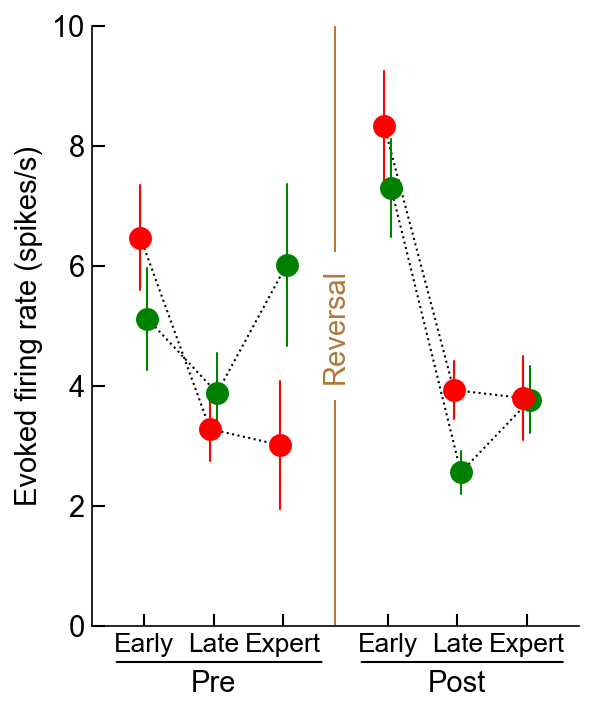

In [12]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(3.25, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25
offset_distance = 0.05

################################################################################################################

data = [Tuning_target_preearly,Tuning_target_prelate,Tuning_target_preexpert,Tuning_target_postearly,Tuning_target_postlate,Tuning_target_postexpert]
data = [ilep.rmnan(d) for d in data]
#Plot summary
colmaxes = [np.nan]*6
for idx,(column,polarity) in enumerate(zip(data,[-1,-1,-1,1,1,1])):
    eye_color = TARGET_COLOR#PHASE_COLORS[idx]
    border_color=eye_color
    summary_size=100
    summary_width=1
    
    #Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    median = np.mean(column)
    print(median)
    Q1 = median - sem(column)
    Q3 = median + sem(column)
    colmaxes[idx] = Q3
    
    ax.scatter([idx+offset_distance+polarity*switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
    ax.plot([idx+offset_distance+polarity*switch_offset, idx+offset_distance+polarity*switch_offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
medians = [np.mean(col) for col in data]
plt.plot(np.linspace(0,2,3)+offset_distance-switch_offset,medians[0:3],color='k',linestyle=':',lw=1)
plt.plot(np.linspace(3,5,3)+offset_distance+switch_offset,medians[3:6],color='k',linestyle=':',lw=1)
    
########################################################
data_two = [Tuning_nontarget_preearly,Tuning_nontarget_prelate,Tuning_nontarget_preexpert,Tuning_nontarget_postearly,Tuning_nontarget_postlate,Tuning_nontarget_postexpert]
data_two = [ilep.rmnan(d) for d in data_two]

#Plot summary
passive_colmaxes = [np.nan]*6
for idx,(column,polarity) in enumerate(zip(data_two,[-1,-1,-1,1,1,1])):
    border_color=NONTARGET_COLOR#PHASE_COLORS[idx]
    eye_color=border_color#'white'

    summary_size=100
    summary_width=1
    
    #Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    median = np.mean(column)
    Q1 = median - sem(column)
    Q3 = median + sem(column)
    passive_colmaxes[idx] = Q3
    
    ax.scatter([idx-offset_distance+polarity*switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10,marker='o')
    ax.plot([idx-offset_distance+polarity*switch_offset, idx-offset_distance+polarity*switch_offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
medians = [np.mean(col) for col in data_two]
plt.plot(np.linspace(0,2,3)-offset_distance-switch_offset,medians[0:3],color='k',linestyle=':',lw=1)
plt.plot(np.linspace(3,5,3)-offset_distance+switch_offset,medians[3:6],color='k',linestyle=':',lw=1)

################################################################################################################

labels = ['Early','Late','Expert','Early','Late','Expert']
# labels2 = [1,2,3,4,5,6]

ax.set_ylim([0,10])
#ax.set_yticks([0,5,10,15,20])
#ax.set_yticklabels([4,5,6,7,8,9,10,11])
ylab = ax.set_ylabel('Evoked firing rate (spikes/s)')
              
ax.set_xlim([-0.75-switch_offset,5.75+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax.set_xticklabels(labels)

# ax2 = ax.twiny()
# ax2.spines['top'].set_visible(True)
# ax2.get_xaxis().set_visible(True)
# ax2.set_xlim([-0.5-switch_offset,5.5+switch_offset])
# ax2.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
# ax2.set_xticklabels(labels2)
# xlab2 = ax2.set_xlabel('Passive exposure phase')

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac)
t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.0425, -stdyfrac), xycoords='axes fraction', xytext=(0.48, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.545, -stdyfrac), xycoords='axes fraction', xytext=(0.975, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)
# ax2.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass
# for item in ([ax2.title, ax2.xaxis.label, ax2.yaxis.label] +
#     ax2.get_xticklabels() + ax2.get_yticklabels()):
#     item.set_fontsize(stdfont)

ax.scatter([], [], ec=TARGET_COLOR,fc=TARGET_COLOR, s=summary_size,lw=summary_width,marker='o',label='Target')
ax.scatter([], [], ec=NONTARGET_COLOR,fc=NONTARGET_COLOR, s=summary_size,lw=summary_width,marker='o',label='Nontarget')
# lgd = ax.legend(frameon=False,loc=(0.8,0.8),fontsize=14)
    
### Log
# Y = 10**np.mean(np.log10(ax.get_ylim()))
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

### Linear
Y = np.mean(ax.get_ylim())
t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

# artists = [ylab,t1,t2,lgd]
artists = [ylab,t1,t2]

# print(len(Tuning_target_preearly))
# print(len(Tuning_target_prelate))
# print(len(Tuning_target_preexpert))
print(len(Tuning_target_postearly))
print(len(Tuning_target_postlate))
# print(len(Tuning_target_postexpert))
# print(len(Tuning_nontarget_preearly))
# print(len(Tuning_nontarget_prelate))
# print(len(Tuning_nontarget_preexpert))
# print(len(Tuning_nontarget_postearly))
# print(len(Tuning_nontarget_postlate))
# print(len(Tuning_nontarget_postexpert))

fig.savefig(os.path.join('C:\\\\Users\\4thgr\\Downloads\\AC Evoked firing rate correct incorrect.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

In [13]:
#Use this. Post is normal, Pre is not
data_dec = SimpleNamespace()
data_dec.preearly = np.abs(Tuning_target_preearly)
data_dec.prelate = np.abs(Tuning_target_prelate)
data_dec.preexpert = np.abs(Tuning_target_preexpert)
data_dec.postearly = np.abs(Tuning_target_postearly)
data_dec.postlate = np.abs(Tuning_target_postlate)
data_dec.postexpert = np.abs(Tuning_target_postexpert)

data_dec2 = SimpleNamespace()
data_dec2.preearly = np.abs(Tuning_nontarget_preearly)
data_dec2.prelate = np.abs(Tuning_nontarget_prelate)
data_dec2.preexpert = np.abs(Tuning_nontarget_preexpert)
data_dec2.postearly = np.abs(Tuning_nontarget_postearly)
data_dec2.postlate = np.abs(Tuning_nontarget_postlate)
data_dec2.postexpert = np.abs(Tuning_nontarget_postexpert)

ilep.nonparametricIndependentStatsCompareToOther(data_dec,data_dec2)
pass

            Source             SS      DF           MS          F  \
0            phase    5984.415968     5.0  1196.883194  11.779770   
1          context     419.131299     1.0   419.131299   4.125106   
2  phase * context     534.170254     5.0   106.834051   1.051465   
3         Residual  268440.331491  2642.0   101.604970        NaN   

          p-unc       np2  
0  2.747249e-11  0.021807  
1  4.235130e-02  0.001559  
2  3.855495e-01  0.001986  
3           NaN       NaN  

          phase  A  B     p-unc    p-corr    hedges
16   post-early  A  B  0.076165  0.152330 -0.075488
17  post-expert  A  B  0.055647  0.152330 -0.090631
18    post-late  A  B  0.001535  0.009208 -0.231447
19    pre-early  A  B  0.269807  0.404711 -0.136474
20   pre-expert  A  B  0.791244  0.819157  0.138370
21     pre-late  A  B  0.819157  0.819157  0.059245
key preearly has 148 and 148 non-nan elements
key prelate has 187 and 187 non-nan elements
key preexpert has 97 and 97 non-nan elements
key postearly

C:\Users\4thgr\AppData\Local\anaconda3\envs\TothSidleckEnv\Lib\site-packages\pingouin\pairwise.py:593: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stats["Time"].fillna("-", inplace=True)
